Check pkl content and format

In [ ]:
#Check pkl file format

import pickle
file_path = "/home/tommy/Projects/cross-architecture/Vector/20250509_new_train_450_token/model/sentences_20250509_train_450.pkl"
with open(file_path, 'rb') as file:
    try:
        data = pickle.load(file)
        #Print 10 samples
        for i in range(10):
            print(data[i])
    except Exception as e:
        print(f"Error loading pickle file: {e}")
        exit(1)

In [ ]:
from pathlib import Path
import json
from preprocessing import _tokenize_line

DATA_DIR = Path("/home/tommy/Projects/cross-architecture/reverse/output_new/results")
TRAIN_CSV_PATH = Path("/home/tommy/Projects/cross-architecture/Experiment3.1/dataset/cleaned_20250509_train_450.csv")
OUTPUT_DIR = Path("/home/tommy/Projects/cross-architecture/Vector/20250509_new_train_450/model")
PICKLE_PATH = OUTPUT_DIR / "sentences_20250509_train_450.pkl"
LOG_PATH = OUTPUT_DIR / "missing_files.log"
BATCH_FILES = 1000

file_name = "/home/tommy/Projects/cross-architecture/reverse/output_new/results/0a1a5e43e62c68c6a5d21b012e66f7e920afa466b8d3c4dbb877ea7d7af1069e/0a1a5e43e62c68c6a5d21b012e66f7e920afa466b8d3c4dbb877ea7d7af1069e.json"
with open(file_name, encoding="utf-8") as f:
    data = json.load(f)
sentences = []
for func_data in data.values():
    for instruction in func_data.get("instructions", []):
        opcode = instruction.get("opcode")
        if opcode:
            sentences.append(opcode)
    print(sentences)  

            


In [ ]:
import pickle

# 指定檔案路徑
pkl_path = "/home/tommy/Projects/cross-architecture/Vector/20250509_new_train_450/model/sentences_20250509_train_450.pkl"

# 載入並顯示內容簡介
with open(pkl_path, "rb") as f:
    data = pickle.load(f)

# 顯示資料類型與前幾筆內容
print("資料型態：", type(data))
print("總筆數：", len(data))

# 顯示前 5 筆資料
for i, item in enumerate(data[:20]):
    print(f"[{i}] {item}")


In [ ]:
import pickle

pkl_path_2 = "/home/tommy/Projects/cross-architecture/Vector/20250509_train_450/model/sentences_all_20250509_train_450.pkl"

with open(pkl_path_2, "rb") as f:
    data_2 = pickle.load(f)
    
print("資料型態：", type(data_2))
print("總筆數：", len(data_2))

for i, item in enumerate(data_2[:5]):
    print(f"[{i}] {item}")

Check vectorize step

In [ ]:
import numpy as np
from preprocessing import read_csv, _tokenize_line
from tqdm import tqdm
import networkx as nx
from gensim.models import Word2Vec
from pathlib import Path
import pickle


def iterate_Gpickle(csv_file_path: str | Path, root_dir: str | Path):
    root_path = Path(root_dir)
    for file_name in tqdm(read_csv(csv_file_path), desc="Processing Gpickle files"):
        prefix = file_name[:2]
        path = root_path / prefix / f"{file_name}.gpickle"
        if path.exists():
            try:
                with open(path, "rb") as fp:
                    G = pickle.load(fp)
                pcode_map = nx.get_node_attributes(G, "pcode")
                yield path, G, pcode_map
            except Exception as e:
                tqdm.write(f"[Error] Load Gpickle Failed {path}: {e}")
        else:
            tqdm.write(f"[Warning] File Not Found: {file_name}.gpickle")

def vectorize_graph_nodes(G: nx.Graph, model: Word2Vec):
    zero_vec = np.zeros(model.vector_size, dtype=float)
    for addr, data in G.nodes(data=True):
        pcode_lines = data.get("pcode", [])
        tokens = [token for line in pcode_lines for token in _tokenize_line(line)]
        vectors = [model.wv[t] for t in tokens if t in model.wv]
        data["vector"] = np.mean(vectors, axis=0) if vectors else zero_vec
        data.pop("pcode", None)


In [ ]:
import pandas as pd
from tqdm import tqdm
import networkx as nx
import numpy as np
from gensim.models import Word2Vec
import pickle
from preprocessing import read_csv
from pathlib import Path

WORD2VEC_MODEL_PATH = "/home/tommy/Projects/pcodeFcg/vector/contrastive/word2vec/CBOW/word2vec_20250509_train_450.model"
model_path = Path(WORD2VEC_MODEL_PATH)
model = Word2Vec.load(str(model_path))

file_path = Path("/home/tommy/Projects/pcodeFcg/vector/contrastive/GNN/train/0a/0a7b126ce6d674bb2f315cf28c21180a69e38a8ff8300240f6ec7075f1aade59.gpickle")
with open(file_path, "rb") as fp:
    G = pickle.load(fp)
    for addr, data in G.nodes(data=True):
        print(f"Node: {addr}, Data: {data}")
        
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Shape of node vectors:{len(data['vector']) if 'vector' in data else 'N/A'}")
    print(f"Sample node data: {list(G.nodes(data=True))[1]}")

UnpicklingError: invalid load key, '{'.

Check vector

In [ ]:
import pickle
import networkx as nx


fil_path = "/home/tommy/Projects/cross-architecture/Vector/20250509_new_test_600_token/data/00/00af1e6cd578195f310f7f08ae163b089104b5e18b6401eb936411dea38fd74a.gpickle"

with open(fil_path, "rb") as fp:
    G = pickle.load(fp)
print(G.nodes(data=True))

In [ ]:
WORD2VEC_MODEL_PATH = "/home/tommy/Projects/cross-architecture/Vector/20250509_new_train_450/model/word2vec_20250509_train_450.model"
model_path = Path(WORD2VEC_MODEL_PATH)
model = Word2Vec.load(str(model_path))
print("Model vocabulary size:", len(model.wv))
print("Sample vocabulary:", list(model.wv.index_to_key)[:10])

Investigate Gpickle

提取向量和標籤...


Processing Gpickle files:  32%|███▏      | 290/900 [00:00<00:00, 903.11it/s]

[Warning] File Not Found: 50ada39c30a04c181c0bd494a60542c1c3eafc198d2964215db1d31a754f51d0.gpickle
[Warning] File Not Found: b723b3a986d1be667ed852850a47d19443ebd88ed0dcf9e19fdf79490c331d0e.gpickle
[Warning] File Not Found: 48ee87163daae6d24d9a55367bdf1f749fb6fe0fda821b7fb1f64dd65d5a4e1a.gpickle


Processing Gpickle files:  67%|██████▋   | 604/900 [00:00<00:00, 800.01it/s] 

[Warning] File Not Found: 969e1b83ab7c47333d519f6bebf6b1038e42110151fa687a3882ed0e4920c588.gpickle
[Warning] File Not Found: 17f54ae087bc1ad0d324d27b7a2729139e00f06d85097c2e287192f74f3d4c19.gpickle
[Warning] File Not Found: 0a49c48c2615087cc853b73f504732197f7fb7a2e57372413306eea391d6b2c0.gpickle
[Warning] File Not Found: 776980a928bae2f0b9f87e1e796f83fd02d03b459987afa9e032a80a76e36576.gpickle
[Warning] File Not Found: eee05a1c49e8125df93f76deb745280947b228ce91f71177013685fe84f56bc2.gpickle
[Warning] File Not Found: 0af795c240b8142bd64c6ef9038bc26f0c5229ef5755b8ae91e669908e56897a.gpickle
[Warning] File Not Found: ea08e66c84ced9d31cd81e04eac5fde41606c2cb7a1a3996bbb3f230a55b59f2.gpickle
[Warning] File Not Found: 3be5bed3dbeb626742b5152b4b5ff0dacf8db5cf34f1f3bd5d408bf947cc23b7.gpickle


Processing Gpickle files:  86%|████████▌ | 773/900 [00:01<00:00, 675.18it/s]

[Warning] File Not Found: f04bb5094b0805e243c8e5c87211ba5da575f7a82c2e184be44d03739aa27f14.gpickle
[Warning] File Not Found: 55d25c4eea07051b4d2ce523a92329aa98f90d3d36c5ec0d17607e562adfc917.gpickle
[Warning] File Not Found: e54c3fd7ada565a04c01e033864e2a605748b6cbd53a41ea3db572991c2b886d.gpickle


Processing Gpickle files: 100%|██████████| 900/900 [00:01<00:00, 729.87it/s]


[Warning] File Not Found: f78d4ebab52767b66996185eb48e0e53f0d1dabdceb7601a35cf513f8eaafb18.gpickle
[Warning] File Not Found: e8037c394640a9f17c128395cda424e769996c92c0ad85af52bdaa5cd2be7cd9.gpickle
[Warning] File Not Found: 9f2e6a670b32dc26d574cd4f5b99cfea85cb6d158f07faaf4df8add10b7f50f2.gpickle
[Warning] File Not Found: bbc451c40ddd1be6425e88e1c74c24d8e9e9eb908dad83b519fb4029d595e28c.gpickle


Processing Gpickle files:   3%|▎         | 71/2100 [00:00<00:02, 700.46it/s]

[Warning] File Not Found: 1f20fd8843c6a5145399c66f16e27d6daa4bed9265891145f643c9a2a9b4626b.gpickle
[Warning] File Not Found: 3e78e1799bfd26e9b9a245bdeaad1ecda258b5ee03cd05fe57a0f47d18636416.gpickle
[Warning] File Not Found: aa4474d13d7eb07fc790759fb04e73fd3948a53eb4825dfe584b010e3a030d1a.gpickle
[Warning] File Not Found: e905964de7509408a4d44ec7c8e743f23b98b25964c92acf118a3ebb698cee63.gpickle
[Warning] File Not Found: 3862d6a1de842210e07d5668212d278a3e12f25e2d5c61471a28b5dc2aa8c773.gpickle
[Warning] File Not Found: b69d9326dd7fff922804a43373a11cd493a18a566c16fccef328799be9724994.gpickle
[Warning] File Not Found: d104d5aaf0d09d22a605195c166d21b1109c91b5f148b611a387d03777b8f55b.gpickle
[Warning] File Not Found: a65a440de4311c47d19a23fcf1bfeb70a646fed23b7f634bbabd11fb75d8eb36.gpickle
[Warning] File Not Found: a8bc202112784175952de75be2687bda7a3aaa517483ce7b8b80ecbf6203cd1d.gpickle
[Warning] File Not Found: c55c25d4d826eb872e07d20330ae22f37d1a5b150b182e53103ee536add51a0f.gpickle
[Warning] 

[Warning] File Not Found: 616d95492b1554f9f7b3d290ab70f1ff5235a0a168e0aaca538e80276b095432.gpickle
[Warning] File Not Found: 8fb5dcdda85d49a853c610ac874693fc0c3c9e1b0dc1bb4dd209ec06b462a08d.gpickle
[Warning] File Not Found: d91ebb3a11cec7aa1278ab5c0b1fd70a4951ca388733698440e866aa4e7718ed.gpickle
[Warning] File Not Found: 3a0c845a00aeb19475dc6b781d6f8b5309315ca184c15476888e3ed374755241.gpickle
[Warning] File Not Found: cb5bb4c06b82c7ae2c24ea1222b64afb83c45717d44316d3e4cdf21054dcae49.gpickle
[Warning] File Not Found: 1f122aff607f1deb06957f4d5cff4519c5a23b8c6f23d4371976f1ced5c7267f.gpickle
[Warning] File Not Found: 55b9fe21d9a079567a75728c34c36f20ddfb29d260ff407f9e76560a98c6c513.gpickle
[Warning] File Not Found: b8ccd8360932e7031947de138e9300bf2d3ab9ccd8fd3253f3cc58ce0e34e9dc.gpickle
[Warning] File Not Found: 3a79405a4c330377877dd3b0036b1b3894f2599735726789f47dc61b7cb76508.gpickle
[Warning] File Not Found: 672da31f06e897cf65b4fa3f31c71b2b2c8b2be39b00cbff2aab2387d1545d66.gpickle
[Warning] 

[Warning] File Not Found: d2dc9b8898740b36ba21fea1f666f441d4c343bd16118b5d2882e1310b4c3f17.gpickle
[Warning] File Not Found: 71551ab93a3beee1992eab4969033be3106eddf4bb9f037be1360ffac361454d.gpickle
[Warning] File Not Found: 1b5351e3069780d49c21cc36eed442d7bf51be93e40d904516470cf2e74c5b52.gpickle
[Warning] File Not Found: e1d5b117c1fa4eab714ac5c642e37d72392907633ca2b3b07d63c42d5cbc75bb.gpickle
[Warning] File Not Found: 737dcf352e8773c6e25b7e810a9c310cdd43b6d8e83d83d26411ce0364b83de8.gpickle
[Warning] File Not Found: d29b5c255987264d9ed7592d23ace5e1b48755ca3899299cc8ff451d4b46f928.gpickle
[Warning] File Not Found: 026e09bbda7a6826319ff3072e370e83dd48e5f53971282c2742b3bdc6a20f2a.gpickle
[Warning] File Not Found: ce7f40dfc14f529460d0038810b497411eedf14097c17fb0e7c36faf7f53be6b.gpickle
[Warning] File Not Found: 0881320a21f6129539fea061797db457aa2d99adf878dd773111d240fc4235ee.gpickle
[Warning] File Not Found: 320d46801747de402332f2cb4260ed7ddd65d0aa6660277b2d0572430b6115c0.gpickle
[Warning] 

Processing Gpickle files:  10%|█         | 214/2100 [00:00<00:02, 684.58it/s]

[Warning] File Not Found: b9c775170e5dc1a83356770818f4bb1d4b80117c04dc5248c8056530fb5f4d03.gpickle
[Warning] File Not Found: 21c01326b41e37ef7abfaeb5c20dfdb4ee7516ae40e26f50c67d6dcab3610a07.gpickle
[Warning] File Not Found: bff87fb9f1b97fbc426cb454be144e83086df38fc3c41b9511c38a7d5a5bb39e.gpickle
[Warning] File Not Found: 41c298572c06de23a19bf0a58d777882be707d0407b8d047a4e0ce4e81f0ae57.gpickle
[Warning] File Not Found: f8bc04d22678e11128ff2e5ef6e80c761770040f4079f503300d884e410bd26a.gpickle
[Warning] File Not Found: 7e68bd1bb2225fe45f981ccd2a2675294dce60b19f9d8bcbde1fff2cd5fac048.gpickle
[Warning] File Not Found: f0188f0154d7b834d5f870fb65e18c6913f5533629b3d32f822fc0817c6cc749.gpickle
[Warning] File Not Found: 8bc889a3e2e31951502ddaf2dfb79b5952c392de1dc5798ed17e67f9fe9b6576.gpickle
[Warning] File Not Found: d34f68241152545f9b261a34b52627211a655835403efc6973ec79edaa0dce6a.gpickle
[Warning] File Not Found: 2472f9b7e84bb640a0f402f685ba4d91f1e35891437211976b5b8dcd5383dd3a.gpickle
[Warning] 

Processing Gpickle files:  17%|█▋        | 365/2100 [00:00<00:02, 725.18it/s]

[Warning] File Not Found: d90224aff9b27c3740ff7a273e759087a1e8e0434808573a73e3954f7702ed44.gpickle
[Warning] File Not Found: 3488d0b7e6698eb9f6c5c5558d6798fb4b74b8406c3f82652cff3f8165989359.gpickle
[Warning] File Not Found: cca8c4473975c3202ebe9b7ddd0804a4263e0738f1a009add2348f8cfab85d64.gpickle
[Warning] File Not Found: 0f0ab123de5d58f0eb6e514f33c7f000ca219cef293d6da10f7e3a1d92515a14.gpickle
[Warning] File Not Found: 807013e127531195ba9286716e9c67e6c834aa52be4de4b3083e452665c65451.gpickle
[Warning] File Not Found: f165fe41315b517bac7298f67b4140c7f168ff64890982230d603998530c2773.gpickle
[Warning] File Not Found: 3fcee0d72b090228197c810ca4b3c0eb407982800f9b5edc653430487b763caf.gpickle
[Warning] File Not Found: a9ed4e5c6de1e89d59238369ec9da8552fc6b56e753e8a73b36b1314dc14c53f.gpickle
[Warning] File Not Found: f618ea784714ff3795e67af774ff01aae6aa71020f595cc8c2e0e1c648a46b0d.gpickle
[Warning] File Not Found: 51713b442171e05c3c285467c4cf9215a2baa58c9d948e9e48a916c69f453f92.gpickle
[Warning] 

[Warning] File Not Found: 1804d418da4d1d684bb6a7075ea039693fc779bc1a537e99b448d8838d006d87.gpickle
[Warning] File Not Found: 7159b4dd832054a958d393773a8b7eae90991341acff9b9158a61977ee5d4aae.gpickle
[Warning] File Not Found: 20399e4ba47066a13e8c81ec211763dc46be7831353466049c64ddcf5706b3e0.gpickle
[Warning] File Not Found: a682415b19a1d401ba69cfe8d8016dddffc6503bdbc38dc09bf34faa5d3a10e1.gpickle
[Warning] File Not Found: e1672fc0923ac0c6908b363c4aa830ba47c65587925cbe53a36648c4ddc3d7d0.gpickle
[Warning] File Not Found: 936ad9392811e338af434950b7d2afd90c4d2e708b7c696951deedb3bb31cc42.gpickle
[Warning] File Not Found: a7506ec749db7599507857e990f48fa2df91e5d43a705bf767e4b94e8738a405.gpickle
[Warning] File Not Found: a2de7fc1f68bf46f402121dd30cd3111f4b9a75098a51933e7402b400599603c.gpickle
[Warning] File Not Found: 53e3d94d6b9ae30e8f9f2dfbeb6e7c34273e9227d6e121d02eda6a25419a8c31.gpickle
[Warning] File Not Found: 84c5f63c63777c9fe2e69e9aefec1b0338d5fe61a3312391d931c321f7ed3959.gpickle
[Warning] 

Processing Gpickle files:  25%|██▍       | 518/2100 [00:00<00:02, 745.45it/s]

[Warning] File Not Found: 19a2031595a6e0d61141b2fc164a1b4df79a2fcc4632988b83a22728fe135afd.gpickle
[Warning] File Not Found: 01f0d429961b5ca26d5f557de2ec4a6f830a2e52d00409ddb2ea0e232ed5e3c8.gpickle
[Warning] File Not Found: 233968f0fa9095a8a036b58a3fcfe7b0ed4438b3b097210f03baa3da7b31c5f7.gpickle
[Warning] File Not Found: 72cae3dd520f99c83e89f751d288076ef9b5fc5aed171f01ede155e054aa20eb.gpickle
[Warning] File Not Found: 64bc4416d8f0e0fdfa8be2c0c6f62fad8f913f9174615264a36d55de4c89ed95.gpickle
[Warning] File Not Found: 7763435ecaba2bfe44952a2fa6f9cab8e965aa420ee6d744de940da87d1c9917.gpickle
[Warning] File Not Found: 4432333378aa3ccda9321af0c41b2839621b962ff86981e314da2b2e2eefc1bf.gpickle
[Warning] File Not Found: 6ecb9aadb649c73880f6982284b2add66d780aad924965e82e764fece2bb5733.gpickle
[Warning] File Not Found: e051e3342704f90b28385c26b36a1e2cdfcf878a3a25aeb25b709f80a73f9e59.gpickle
[Warning] File Not Found: 6b7dce1a4ea05f8541393c40ba6ea47e271e37d10b93c67b6ae54f1e53b3e20d.gpickle
[Warning] 

Processing Gpickle files:  25%|██▍       | 518/2100 [00:00<00:02, 745.45it/s]

[Warning] File Not Found: 07b6a242db354674402685c5e212a48098ade3b2a0e4b1d095ffc61919c32286.gpickle
[Warning] File Not Found: 39695e4e73b5a2c47bf80188adb2167060bab56e809a29f6a9dac3f69cbc2eab.gpickle
[Warning] File Not Found: db2efc48459340ae8fea3cbc6b3089c42f8cb35585d8909d221dec1c89ce5734.gpickle
[Warning] File Not Found: 3b021c946ab7bebb2b1c90729004785417baadd59f9f3e35a7a803828647ad03.gpickle
[Warning] File Not Found: 4c60b9c8c55fde1a1b11cc48756d211e4f195563537c5a1dde78ebf9613b6559.gpickle
[Warning] File Not Found: 9bd3568195d85f1530420641fd08e8439404a8e95b8994815c03f3eac201512d.gpickle
[Warning] File Not Found: c6ceb474f7825817748743eb42081790b3ea062824687ccbee5118abbe4518de.gpickle
[Warning] File Not Found: 2c36110c46d79880ff642907237ac91ac21839e48d3fcd4e66965a043d71d4f2.gpickle
[Warning] File Not Found: 03ca3fec206025e7c1349b327318eb1c6c632b5c4b3aff2e368c8663aa59b194.gpickle
[Warning] File Not Found: c528fdbc8bc5cf2a0152e59ecc3d1c88accec32113e535963ef0ac5a53e205b7.gpickle
[Warning] 

Processing Gpickle files:  32%|███▏      | 671/2100 [00:00<00:01, 743.46it/s]

[Warning] File Not Found: cd884c3f7ff5d4fe4b1c7aaf66f2268e5e25a8490f1ba7fd89be9c71f04feb26.gpickle
[Warning] File Not Found: 2d8fa55ab20ab03c012051f62ebfc24f8d6a3d54894f167eb2887ce90e182fc6.gpickle
[Warning] File Not Found: b32d3cba30b87ff5b0d605f87ecdf9143391f98707ca770c597591f0b0561ada.gpickle
[Warning] File Not Found: 70141c63e8f3990b5409663bb735fd7a3fd850d0a73dc8f22d05929c80ac404c.gpickle
[Warning] File Not Found: 59f5a648c7f4f016bae373dada928758bf5f78dbc12f66c607705156785e6e5c.gpickle
[Warning] File Not Found: 3af923f5225c41c495f16adac67f07241196489e2a0dcea3be7b116d1909ef04.gpickle
[Warning] File Not Found: c7905cba6deead176b0c25acbadc464b797e296c59c56ee763989fc347896a16.gpickle
[Warning] File Not Found: 5d767f14c94cb839fb62d9189d9264ecfde8d7aaab4247525767ebb1e5e17c9a.gpickle
[Warning] File Not Found: 24f11db8f3c4a6f7d8898d36f2d3ada82a29457d029fac0cea6febb92e8d4ea0.gpickle
[Warning] File Not Found: 1654a1d3f803e610030ebdbe3de1ec90672c00868d3a5ab00c0fb28eda049975.gpickle
[Warning] 

[Warning] File Not Found: a22bc0b029f68549e321efdbe8e0890fc8768d4bbe29c3d4ff3fd29d26349dc5.gpickle
[Warning] File Not Found: 93a31fb80337941ed94749089390088c197cb7bbd41f4609403ff09a87892e31.gpickle
[Warning] File Not Found: 553b39d4308d87c609a9549f4551cbb1459a4ef0125cf891a989b52494f1fe60.gpickle
[Warning] File Not Found: 640b2def8426ff0e7df5e6b89732aced46dbca67b8d6429a2011d9afd0740fde.gpickle
[Warning] File Not Found: ec13888c1592854c220c2b1e46a0423fba436223da51a574b1301a96f6f1a4d0.gpickle
[Warning] File Not Found: 778978de6c23ad219b61edddcfc6e2137dffacf088c2440887612cc985f18323.gpickle
[Warning] File Not Found: 5ce6cf87e8444332ef2e15cef2c2ca4bab85ac5b55f921852dbe0bd3f656ef3e.gpickle
[Warning] File Not Found: 3fee8cb9e435000fcd4f502c5761cb918246da8629442b1dc5c57b4f72175a84.gpickle
[Warning] File Not Found: 8c677e47648249a833b8e92b0bd7c4e2b25651a984c917b62f919e13704e59b3.gpickle
[Warning] File Not Found: c5b1208312387f4c8fc47a179971b491267b5bc11cf4ba8af149b4b0eef9f39d.gpickle
[Warning] 

Processing Gpickle files:  36%|███▌      | 746/2100 [00:01<00:01, 709.57it/s]

[Warning] File Not Found: 7a430483ce66587a63466c2a97ae21bb395dde771c4d8792634b124e918c8189.gpickle
[Warning] File Not Found: aa70e56bf302b76a52fbdb4a5747b88f414aa6d6dc4e753848a907f424e8bac8.gpickle
[Warning] File Not Found: a6610c12c25fa083df4bcf2d7a07b2e7618072753d2fe6de1c3986d152c6064c.gpickle
[Warning] File Not Found: 60790bba50b5b04f10b02255853bafdfa3ba5836ddb2c79225240fa0fc427565.gpickle
[Warning] File Not Found: 36a31003bdc97ea6f0477f5b851943c2e7abab2feb295f068f1590b85385827b.gpickle
[Warning] File Not Found: 18c7a1a0c68faea00c3c7f2a84aa144c98228242ee08fd884ea118f03240fdbd.gpickle
[Warning] File Not Found: 5933915b400132fe7b39a9afc696066d43349d9a9bf02474c876773602debc82.gpickle
[Warning] File Not Found: d6261c19ca5b51d00570848b0fc3f4b98eb8881ab17e36640a0879d7980d4d99.gpickle
[Warning] File Not Found: 9e373637eb648bae0db3647a748e59d72b75b8e0e86d87250a9efc689f40888d.gpickle
[Warning] File Not Found: 683b1eb0241b021df573718f107ee8ec4874a7fe1387196824585574c8c0e805.gpickle
[Warning] 

Processing Gpickle files:  39%|███▉      | 818/2100 [00:01<00:01, 709.47it/s]

[Warning] File Not Found: 98d82b33809c4aacbba031ed5fab49ac367591bc38d368d8cffe8f51d3db5efe.gpickle
[Warning] File Not Found: 1683775e62eae21ca82ebab327749788e5feb0116743d2b3086b470d254e2b05.gpickle
[Warning] File Not Found: 45dd77051878b61344c928d52694828bade3227bd43c48492688e112cdf1f89f.gpickle
[Warning] File Not Found: f8e4e611dce600a66f40e3e0cbf9ba97d78142b3994c1434306e3f18d5a82a74.gpickle
[Warning] File Not Found: 285a07e40bb07425845f5f9b4111c84ef66d64d1b42dac6ec444cfb928a6417f.gpickle
[Warning] File Not Found: 13f2e197dee6b19893e6ad409a1e24c94320ec320517b4133f70b2cb6dbec1bb.gpickle
[Warning] File Not Found: 6b64ec1489acfd64bcd02e117a3a6529ac118971b9f8b12a6eb99339a5450731.gpickle
[Warning] File Not Found: f671528a8dcef9bda52c83c43c1e8954aee3b28dab93dc2e617a67e10f19c6cf.gpickle
[Warning] File Not Found: c810cd71f163a8b388943bac50bc34f70f5243ffb5291544464dd7b2a60ca74f.gpickle
[Warning] File Not Found: c8d87d89d43657abff71f6f62d1b23ffe3660b39df199ab3be807d78534f6e9a.gpickle
[Warning] 

Processing Gpickle files:  42%|████▏     | 890/2100 [00:01<00:01, 670.57it/s]

[Warning] File Not Found: 81f94b9fd8201a0e0f08dea98b4a046964c1afb68bcf6b673950cdcd47751a3f.gpickle
[Warning] File Not Found: 5aafd156845fb3a94b3b9e8c5f8d4b3a626164c51c9b1d057fa2c299f7cd92fa.gpickle
[Warning] File Not Found: f9271a4715afdb053e41d5a072d33e3c98e46a7a524a16ac2080391e7beef57e.gpickle
[Warning] File Not Found: 72be80a699b58cf5740008811c5db751d80a8f5cb1cf46c03386b0ee0eddf7f9.gpickle
[Warning] File Not Found: a93124688cab50df8a7a739fac6135ce21a47d684b1afc47d8a5aca49bfd16d5.gpickle
[Warning] File Not Found: 2a2db738de8e9dcdb28f6a6e5923cf93148abdbc24e137bdcfc22e2a5c2b0002.gpickle
[Warning] File Not Found: c3b87ad5ece5681d5081ae15f15102e38c24caf5a29914b1374e0f34581ea14b.gpickle
[Warning] File Not Found: e9eaf0d5b4769c122c5abe7f2aff892cf766c5c7f72a748cf4ca8f200a940021.gpickle
[Warning] File Not Found: 376a483c2324db3b0a436cd83e7b6e777ab7436498c2a8179eb51c80807ccf4d.gpickle
[Warning] File Not Found: 879af0fe13299d3efd2fb6923420c4af757a9820f55079561f8eb0ce57f914ee.gpickle
[Warning] 

Processing Gpickle files:  50%|████▉     | 1048/2100 [00:01<00:01, 579.59it/s]

[Warning] File Not Found: 71c7bdd3bbb87878799ac9e93e45ecdd005aa964677da50b85253146b7eeabbc.gpickle


Processing Gpickle files:  74%|███████▍  | 1563/2100 [00:02<00:00, 564.71it/s]

[Warning] File Not Found: 37cc94d24cad4e4d446f175db1d182cd1eecc16db48654393a3bb7a4fafc5dcc.gpickle
[Warning] File Not Found: 437a03e41d7738f02776b808d5e2e2e824fd32ce610ec5b2a53b940f424cb30e.gpickle
[Warning] File Not Found: 8ec4b362d2b54eae9c0bb2fd2d912da7046beb3fa17cdae5449a9900c6685160.gpickle
[Warning] File Not Found: 4bc77a5fe2243b1320406ea7c834bdfc00cde674e2ea5d51e1e86001bacf1568.gpickle


Processing Gpickle files:  88%|████████▊ | 1838/2100 [00:02<00:00, 640.65it/s]

[Warning] File Not Found: 0b7f5455f39c35904ced9c2d3856f9d24525af757f3c419369a2179522b8adc9.gpickle


Processing Gpickle files:  94%|█████████▍| 1973/2100 [00:03<00:00, 535.07it/s]

[Warning] File Not Found: d8b2fe289c57f64971d8b9f7cde1ad392d5778c89abef940e80fc3ee401cb850.gpickle


Processing Gpickle files: 100%|██████████| 2100/2100 [00:03<00:00, 624.28it/s]


總共載入 2074 個向量
向量維度: (2074, 256)
執行t-SNE並創建視覺化...


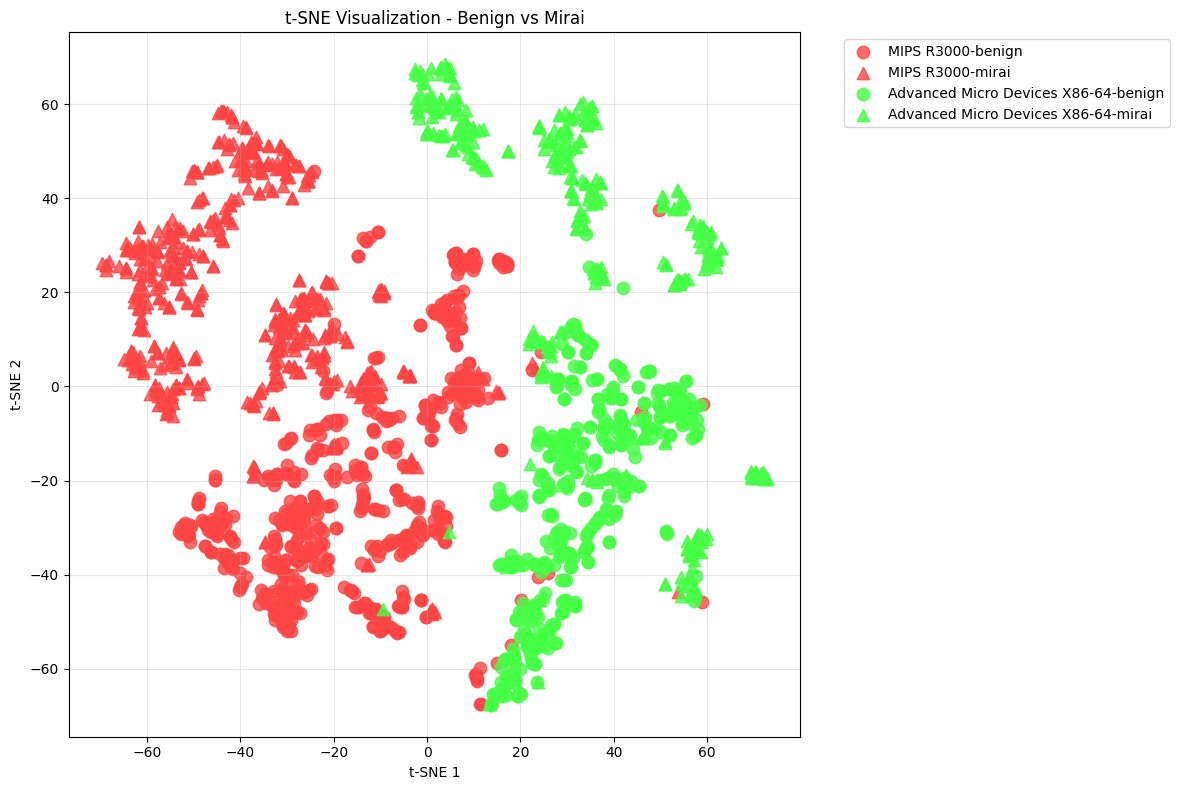

In [1]:
import pandas as pd
import pickle
import numpy as np
from pathlib import Path
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from typing import List, Union

def iterate_Gpickle(csv_file_path: Union[str, Path], root_dir: Union[str, Path]):
    root_path = Path(root_dir)
    df = pd.read_csv(csv_file_path)
    
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing Gpickle files"):
        file_name = row['file_name']
        cpu = row['CPU']
        label = row['label']
        
        prefix = file_name[:2]
        path = root_path / prefix / f"{file_name}.gpickle"
        
        if path.exists():
            try:
                with open(path, "rb") as fp:
                    G = pickle.load(fp)
                yield path, G, cpu, label, file_name
            except Exception as e:
                tqdm.write(f"[Error] Load Gpickle Failed {path}: {e}")
        else:
            tqdm.write(f"[Warning] File Not Found: {file_name}.gpickle")

def extract_vectors_and_labels(train_csv, train_data_dir, test_csv, test_data_dir):
    """提取所有向量和標籤"""
    vectors = []
    cpus = []
    labels = []
    file_names = []
    
    # 處理訓練數據
    for path, G, cpu, label, file_name in iterate_Gpickle(train_csv, train_data_dir):
        # 從所有節點中提取向量並取平均
        node_vectors = []
        for node, data in G.nodes(data=True):
            if 'vector' in data and data['vector'] is not None:
                if len(data['vector']) == 256:
                    node_vectors.append(data['vector'])
        
        if node_vectors:
            # 計算所有節點向量的平均值
            avg_vector = np.mean(node_vectors, axis=0)
            vectors.append(avg_vector)
            cpus.append(cpu)
            labels.append(label)
            file_names.append(file_name)
    
    # 處理測試數據
    for path, G, cpu, label, file_name in iterate_Gpickle(test_csv, test_data_dir):
        node_vectors = []
        for node, data in G.nodes(data=True):
            if 'vector' in data and data['vector'] is not None:
                if len(data['vector']) == 256:
                    node_vectors.append(data['vector'])
        
        if node_vectors:
            avg_vector = np.mean(node_vectors, axis=0)
            vectors.append(avg_vector)
            cpus.append(cpu)
            labels.append(label)
            file_names.append(file_name)
    
    return np.array(vectors), cpus, labels, file_names

def visualize_tsne(vectors, cpus, labels):
    """執行t-SNE並視覺化"""
    # t-SNE降維
    tsne = TSNE(n_components=2, random_state=42, perplexity=15)
    vectors_2d = tsne.fit_transform(vectors)
    
    # 設定顏色和標記
    cpu_colors = {
        'MIPS R3000': '#FF4444',    
        'ARM': '#4444FF',           
        'Advanced Micro Devices X86-64': '#44FF44'  
    }
    
    label_markers = {
        'benign': 'o',    # 圓形
        'mirai': '^'    # 菱形
    }
    
    # 只顯示benign和tsunami
    fig, ax = plt.subplots(figsize=(12, 8))

    cpu_list = ['ARM', 'MIPS R3000', 'Advanced Micro Devices X86-64']
    target_labels = ['benign', 'mirai']
    
    for cpu in cpu_list:
        for label in target_labels:
            mask = [(c == cpu and l == label) for c, l in zip(cpus, labels)]
            if any(mask):
                current_vectors = vectors_2d[mask]
                ax.scatter(current_vectors[:, 0], current_vectors[:, 1],
                         c=cpu_colors[cpu], marker=label_markers[label],
                         alpha=0.8, s=80, label=f'{cpu}-{label}')
    
    ax.set_title('t-SNE Visualization - Benign vs Mirai')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 主程序
def main():
    # 文件路徑
    train_csv = "/home/tommy/Projects/pcodeFcg/dataset/csv/train.csv"
    test_csv = "/home/tommy/Projects/pcodeFcg/dataset/csv/test.csv"
    train_data_dir = "/home/tommy/Projects/pcodeFcg/vector/contrastive/GNN/mips/train"
    test_data_dir = "/home/tommy/Projects/pcodeFcg/vector/contrastive/GNN/mips/test"

    # 提取數據
    print("提取向量和標籤...")
    vectors, cpus, labels, file_names = extract_vectors_and_labels(
        train_csv, train_data_dir, test_csv, test_data_dir
    )
    
    print(f"總共載入 {len(vectors)} 個向量")
    print(f"向量維度: {vectors.shape}")
    
    # 視覺化
    print("執行t-SNE並創建視覺化...")
    visualize_tsne(vectors, cpus, labels)

if __name__ == "__main__":
    main()

提取向量和標籤...


Processing Gpickle files:  16%|█▌        | 143/900 [00:00<00:00, 1426.73it/s]

[Warning] File Not Found: 50ada39c30a04c181c0bd494a60542c1c3eafc198d2964215db1d31a754f51d0.gpickle
[Warning] File Not Found: b723b3a986d1be667ed852850a47d19443ebd88ed0dcf9e19fdf79490c331d0e.gpickle
[Warning] File Not Found: 48ee87163daae6d24d9a55367bdf1f749fb6fe0fda821b7fb1f64dd65d5a4e1a.gpickle


Processing Gpickle files:  64%|██████▍   | 580/900 [00:00<00:00, 1230.33it/s]

[Warning] File Not Found: 969e1b83ab7c47333d519f6bebf6b1038e42110151fa687a3882ed0e4920c588.gpickle
[Warning] File Not Found: 17f54ae087bc1ad0d324d27b7a2729139e00f06d85097c2e287192f74f3d4c19.gpickle
[Warning] File Not Found: 0a49c48c2615087cc853b73f504732197f7fb7a2e57372413306eea391d6b2c0.gpickle
[Warning] File Not Found: 776980a928bae2f0b9f87e1e796f83fd02d03b459987afa9e032a80a76e36576.gpickle
[Warning] File Not Found: eee05a1c49e8125df93f76deb745280947b228ce91f71177013685fe84f56bc2.gpickle
[Warning] File Not Found: 0af795c240b8142bd64c6ef9038bc26f0c5229ef5755b8ae91e669908e56897a.gpickle
[Warning] File Not Found: ea08e66c84ced9d31cd81e04eac5fde41606c2cb7a1a3996bbb3f230a55b59f2.gpickle
[Warning] File Not Found: 3be5bed3dbeb626742b5152b4b5ff0dacf8db5cf34f1f3bd5d408bf947cc23b7.gpickle


Processing Gpickle files: 100%|██████████| 900/900 [00:00<00:00, 1073.08it/s]


[Warning] File Not Found: f04bb5094b0805e243c8e5c87211ba5da575f7a82c2e184be44d03739aa27f14.gpickle
[Warning] File Not Found: 55d25c4eea07051b4d2ce523a92329aa98f90d3d36c5ec0d17607e562adfc917.gpickle
[Warning] File Not Found: e54c3fd7ada565a04c01e033864e2a605748b6cbd53a41ea3db572991c2b886d.gpickle
[Warning] File Not Found: f78d4ebab52767b66996185eb48e0e53f0d1dabdceb7601a35cf513f8eaafb18.gpickle
[Warning] File Not Found: e8037c394640a9f17c128395cda424e769996c92c0ad85af52bdaa5cd2be7cd9.gpickle
[Warning] File Not Found: 9f2e6a670b32dc26d574cd4f5b99cfea85cb6d158f07faaf4df8add10b7f50f2.gpickle
[Warning] File Not Found: bbc451c40ddd1be6425e88e1c74c24d8e9e9eb908dad83b519fb4029d595e28c.gpickle


Processing Gpickle files:   9%|▉         | 105/1200 [00:00<00:01, 1049.97it/s]

[Warning] File Not Found: c75709091e4f13d7bab6a94f3af94f6af1a9176f0a7c306aa307339577527da2.gpickle
[Warning] File Not Found: 71c7bdd3bbb87878799ac9e93e45ecdd005aa964677da50b85253146b7eeabbc.gpickle


Processing Gpickle files:  67%|██████▋   | 804/1200 [00:00<00:00, 1172.59it/s]

[Warning] File Not Found: 37cc94d24cad4e4d446f175db1d182cd1eecc16db48654393a3bb7a4fafc5dcc.gpickle
[Warning] File Not Found: 437a03e41d7738f02776b808d5e2e2e824fd32ce610ec5b2a53b940f424cb30e.gpickle
[Warning] File Not Found: 8ec4b362d2b54eae9c0bb2fd2d912da7046beb3fa17cdae5449a9900c6685160.gpickle
[Warning] File Not Found: 4bc77a5fe2243b1320406ea7c834bdfc00cde674e2ea5d51e1e86001bacf1568.gpickle
[Warning] File Not Found: 0b7f5455f39c35904ced9c2d3856f9d24525af757f3c419369a2179522b8adc9.gpickle


Processing Gpickle files: 100%|██████████| 1200/1200 [00:01<00:00, 1159.75it/s]


[Warning] File Not Found: d8b2fe289c57f64971d8b9f7cde1ad392d5778c89abef940e80fc3ee401cb850.gpickle
總共載入 2074 個向量
向量維度: (2074, 256)
執行t-SNE並創建視覺化...


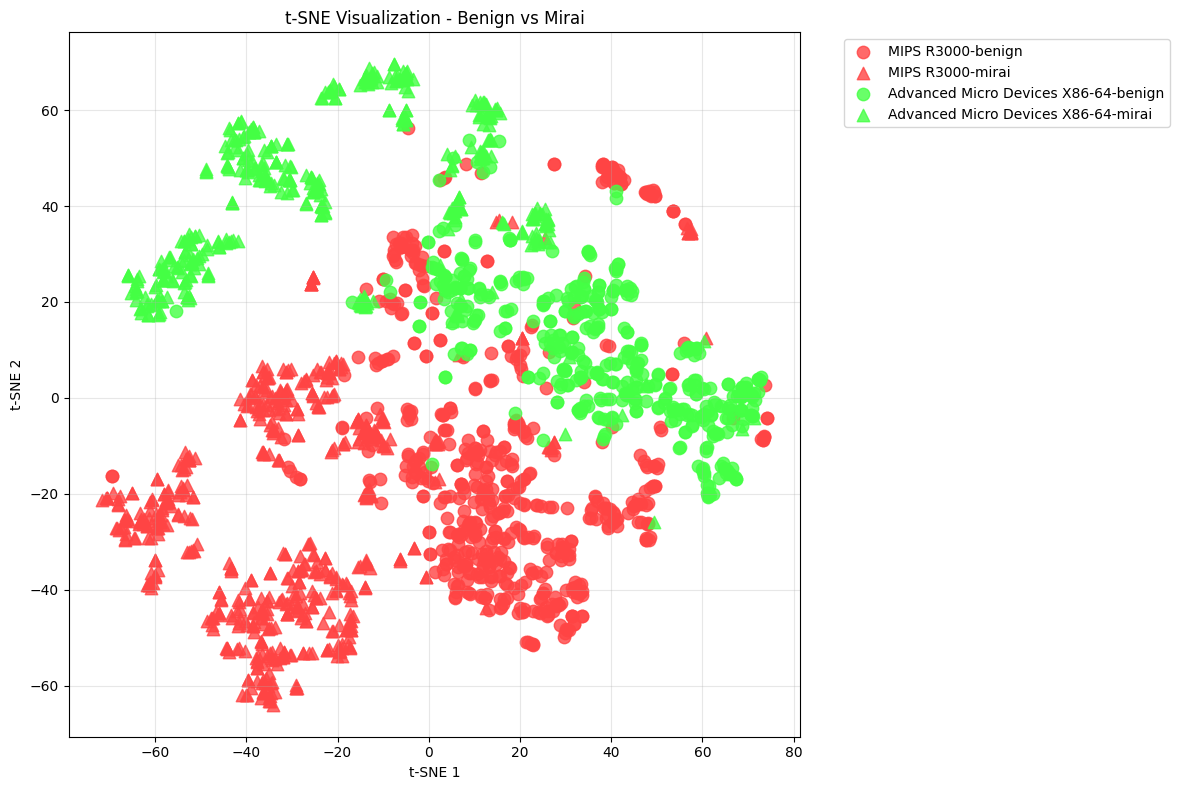

In [2]:
import pandas as pd
import pickle
import numpy as np
from pathlib import Path
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from typing import List, Union

def iterate_Gpickle(csv_file_path: Union[str, Path], root_dir: Union[str, Path]):
    root_path = Path(root_dir)
    df = pd.read_csv(csv_file_path)
    
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing Gpickle files"):
        file_name = row['file_name']
        cpu = row['CPU']
        label = row['label']
        
        prefix = file_name[:2]
        path = root_path / prefix / f"{file_name}.gpickle"
        
        if path.exists():
            try:
                with open(path, "rb") as fp:
                    G = pickle.load(fp)
                yield path, G, cpu, label, file_name
            except Exception as e:
                tqdm.write(f"[Error] Load Gpickle Failed {path}: {e}")
        else:
            tqdm.write(f"[Warning] File Not Found: {file_name}.gpickle")

def extract_vectors_and_labels(train_csv, train_data_dir, test_csv, test_data_dir):
    """提取所有向量和標籤"""
    vectors = []
    cpus = []
    labels = []
    file_names = []
    
    # 處理訓練數據
    for path, G, cpu, label, file_name in iterate_Gpickle(train_csv, train_data_dir):
        # 從所有節點中提取向量並取平均
        node_vectors = []
        for node, data in G.nodes(data=True):
            if 'vector' in data and data['vector'] is not None:
                if len(data['vector']) == 256:
                    node_vectors.append(data['vector'])
        
        if node_vectors:
            # 計算所有節點向量的平均值
            avg_vector = np.mean(node_vectors, axis=0)
            vectors.append(avg_vector)
            cpus.append(cpu)
            labels.append(label)
            file_names.append(file_name)
    
    # 處理測試數據
    for path, G, cpu, label, file_name in iterate_Gpickle(test_csv, test_data_dir):
        node_vectors = []
        for node, data in G.nodes(data=True):
            if 'vector' in data and data['vector'] is not None:
                if len(data['vector']) == 256:
                    node_vectors.append(data['vector'])
        
        if node_vectors:
            avg_vector = np.mean(node_vectors, axis=0)
            vectors.append(avg_vector)
            cpus.append(cpu)
            labels.append(label)
            file_names.append(file_name)
    
    return np.array(vectors), cpus, labels, file_names

def visualize_tsne(vectors, cpus, labels):
    """執行t-SNE並視覺化"""
    # t-SNE降維
    tsne = TSNE(n_components=2, random_state=42, perplexity=15)
    vectors_2d = tsne.fit_transform(vectors)
    
    # 設定顏色和標記
    cpu_colors = {
        'MIPS R3000': '#FF4444',    
        'ARM': '#4444FF',           
        'Advanced Micro Devices X86-64': '#44FF44'  
    }
    
    label_markers = {
        'benign': 'o',    # 圓形
        'mirai': '^'    # 菱形
    }
    
    # 只顯示benign和tsunami
    fig, ax = plt.subplots(figsize=(12, 8))
    
    cpu_list = ['ARM', 'MIPS R3000', 'Advanced Micro Devices X86-64']
    target_labels = ['benign', 'mirai']
    
    for cpu in cpu_list:
        for label in target_labels:
            mask = [(c == cpu and l == label) for c, l in zip(cpus, labels)]
            if any(mask):
                current_vectors = vectors_2d[mask]
                ax.scatter(current_vectors[:, 0], current_vectors[:, 1],
                         c=cpu_colors[cpu], marker=label_markers[label],
                         alpha=0.8, s=80, label=f'{cpu}-{label}')
    
    ax.set_title('t-SNE Visualization - Benign vs Mirai')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 主程序
def main():
    # 文件路徑
    train_csv = "/home/tommy/Projects/pcodeFcg/dataset/csv/train.csv"
    test_csv = "/home/tommy/Projects/pcodeFcg/dataset/csv/test_mips.csv"
    train_data_dir = "/home/tommy/Projects/pcodeFcg/vector/contrastive/GNN/mips/train_transfer"
    test_data_dir = "/home/tommy/Projects/pcodeFcg/vector/contrastive/GNN/mips/test_transfer"

    # 提取數據
    print("提取向量和標籤...")
    vectors, cpus, labels, file_names = extract_vectors_and_labels(
        train_csv, train_data_dir, test_csv, test_data_dir
    )
    
    print(f"總共載入 {len(vectors)} 個向量")
    print(f"向量維度: {vectors.shape}")
    
    # 視覺化
    print("執行t-SNE並創建視覺化...")
    visualize_tsne(vectors, cpus, labels)

if __name__ == "__main__":
    main()

Check normalization

In [ ]:
import json
import random
from preprocessing import _tokenize_line

# 輸入 JSON 路徑
file_name = "/home/tommy/Projects/cross-architecture/reverse/output_new/results/0a1a5e43e62c68c6a5d21b012e66f7e920afa466b8d3c4dbb877ea7d7af1069e/0a1a5e43e62c68c6a5d21b012e66f7e920afa466b8d3c4dbb877ea7d7af1069e.json"

with open(file_name, encoding="utf-8") as f:
    data = json.load(f)

# 收集所有 instructions 的 operation
tokenized = []

for func in data.values():
    for instr in func.get("instructions", []):
        op_str = instr.get("operation")
        if isinstance(op_str, str):
            tokens = _tokenize_line(op_str)
            if tokens:
                tokenized.extend(tokens)

# 隨機抽 30 條（若不足 30 則抽全部）
sample_size = min(100, len(tokenized))
for line in random.sample(tokenized, sample_size):
    print(line)


In [ ]:
import json
import random

file_name = "/home/tommy/Projects/cross-architecture/reverse/output_new/results/0a1a5e43e62c68c6a5d21b012e66f7e920afa466b8d3c4dbb877ea7d7af1069e/0a1a5e43e62c68c6a5d21b012e66f7e920afa466b8d3c4dbb877ea7d7af1069e.json"

with open(file_name, encoding="utf-8") as f:
    data = json.load(f)

operations = []

for func in data.values():
    for instr in func.get("instructions", []):
        op_str = instr.get("operation")
        if isinstance(op_str, str):
            operations.append(op_str)

# 隨機選取 30 條印出（或全部如果少於 30）
sample_size = min(30, len(operations))
for line in random.sample(operations, sample_size):
    print(line)


Check pkl

In [ ]:
import pickle

file_path = "/home/tommy/Projects/pcodeFcg/vector/contrastive/word2vec/CBOW/sentences_train.pkl"

with open(file_path, 'rb') as file:
    try:
        data = pickle.load(file)
        # Print 10 samples
        for i in range(100):
            print(data[i])
    except Exception as e:
        print(f"Error loading pickle file: {e}")
        exit(1)